# Uber - Insights from City Supply and Demand Data

# **Assignment**

Using the provided dataset, answer the following questions:

Which date had the most completed trips during the two week period?

What was the highest number of completed trips within a 24 hour period?

Which hour of the day had the most requests during the two week period?

What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?

What is the weighted average ratio of completed trips per driver during the two week period?

In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

True or False: Driver supply always increases when demand increases during the two week period.

In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

True or False: There is exactly two weeks of data in this analysis

Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset_1.csv')
df


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3


In [24]:
 df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3


In [25]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [26]:
df.tail()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3
335,NaN,6,9,1,2,2,7


In [27]:
df.head(10)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


# **Data Exploration**

Before diving into questions, first, let's analyze the dataset through some visualizations. Let's start with importing commonly used libraries.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will do some plotting and so want to have the next fixed figure size in all visuals.

In [29]:
plt.rcParams["figure.figsize"] = (12,8)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              15 non-null     object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


We have null values only in the Date column. If they are null continuously until the starting of the next day, we can use the forward fill method which replaces the NULL values with the value from the previous row (or previous column, if the axis parameter is set to 'columns').

In [31]:
df.head(18)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


Let's fill non-values using the forward fill method.

In [32]:
# forward fill empty Dates
df = df.fillna(method="ffill")
df

<ipython-input-32-f412aba56454>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


Now, we have the dataset without non-null values. Another thing that could be useful in the question part is creating timestamps with given date and time values. Let's do it by using f-strings

In [34]:
def create_timestamp(date, time):
    return pd.to_datetime(f"{date} {time}:00")
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00
...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00


It seems nothing to deal with more in the data preprocessing part. The dataset is already in a good shape. Next, we will do some visualization with the given data to embrace more of the given overview for the dataset. We expect to see lots of eyeballs compared to other columns since some of them will be converted to zeroes, requests and completed trips. Let's plot these values with dates and see if is there any relation between them.

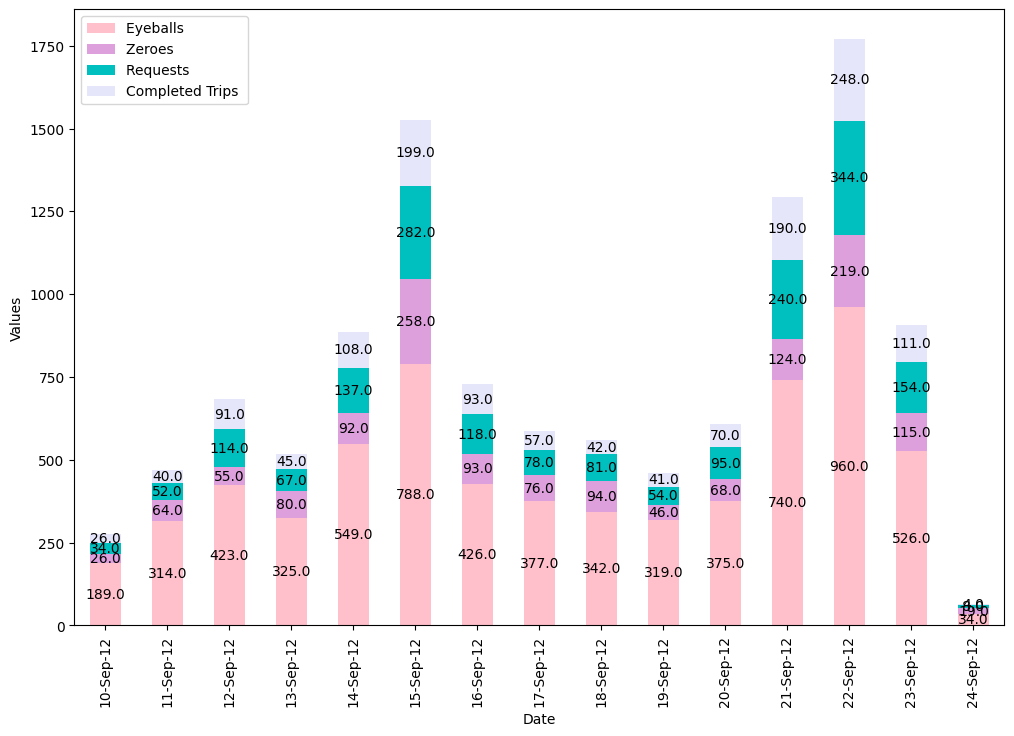

In [35]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['pink', 'plum', 'c', 'lavender']), None, len(df)))

ax = df[['Date','Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ']].groupby('Date').sum().reset_index().plot(
    kind='bar', stacked=True, x='Date', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)
plt.ylabel("Values")
plt.show()

The values against the date plot seem to kind of have weekly seasonality. We have a very short time interval to test it but still, we can check it by plotting against weekdays. For this purpose, we will use the .weekday attribute of pandas which will return an integer representing the corresponding weekday. We will aggregate and sum all values based on whether it falls under which weekday and plot.

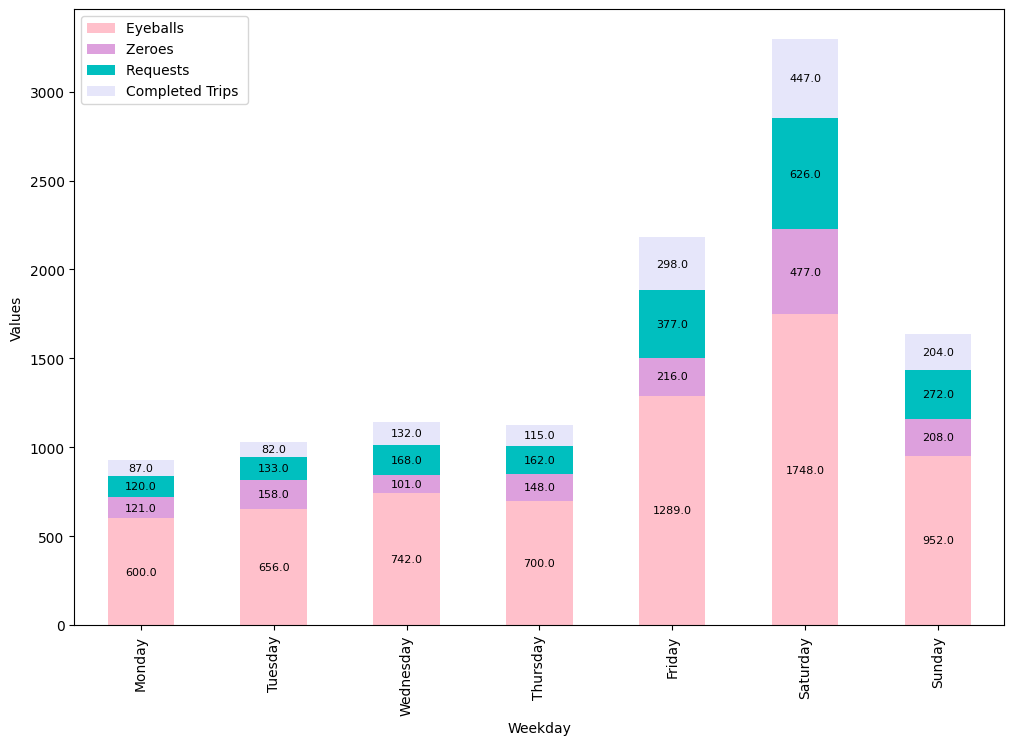

In [36]:
df['Weekday'] = df['Timestamp'].dt.weekday
df_agg_weekday = df.groupby('Weekday').agg({
    'Eyeballs ': 'sum',
    'Zeroes ': 'sum',
    'Requests ': 'sum',
    'Completed Trips ': 'sum'
}).reset_index()

day_of_week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_agg_weekday['Weekday'] = df_agg_weekday['Weekday'].map(day_of_week)

ax=df_agg_weekday[['Weekday','Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ']].plot(
    kind='bar', stacked=True, x='Weekday', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel("Values")
plt.show()

According to our 14 days data, Saturdays are the busiest. Let's see the aggregated results by the hour.

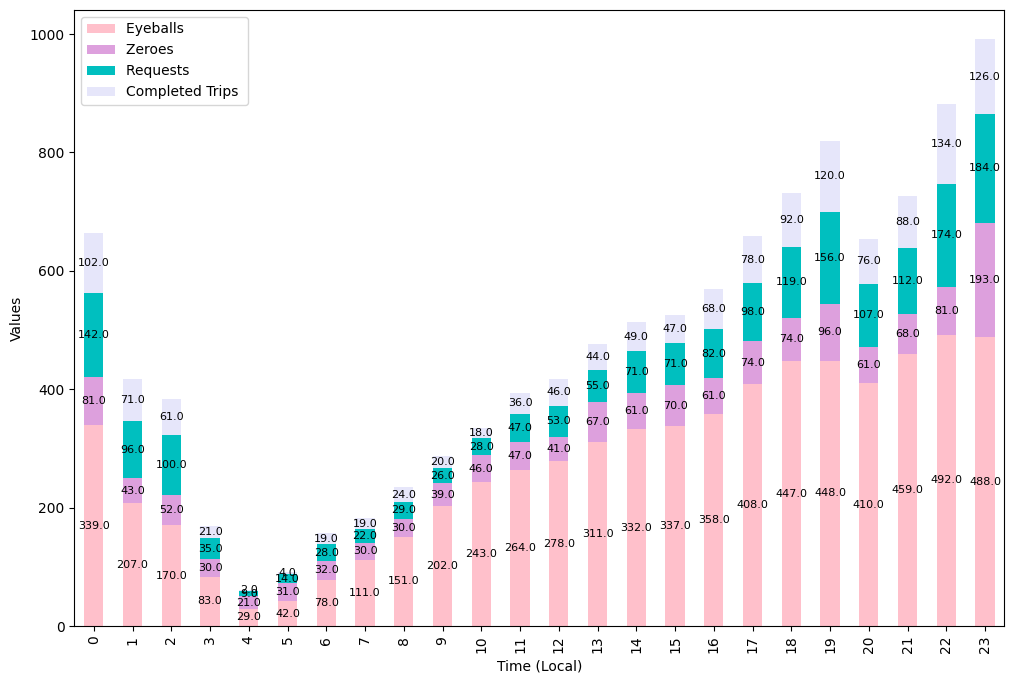

In [37]:
ax = df[['Time (Local)','Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ']].groupby('Time (Local)').sum().reset_index().plot(
    kind='bar', stacked=True, x='Time (Local)', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel("Values")
plt.show()

The busiest hour of the day is between 23 and midnight based on the above plot. Also, the least traffic on the app occurred on 4 am, which is logical. Let's also observe the unique drivers' distribution aggregated on weekdays and hours as next plots.

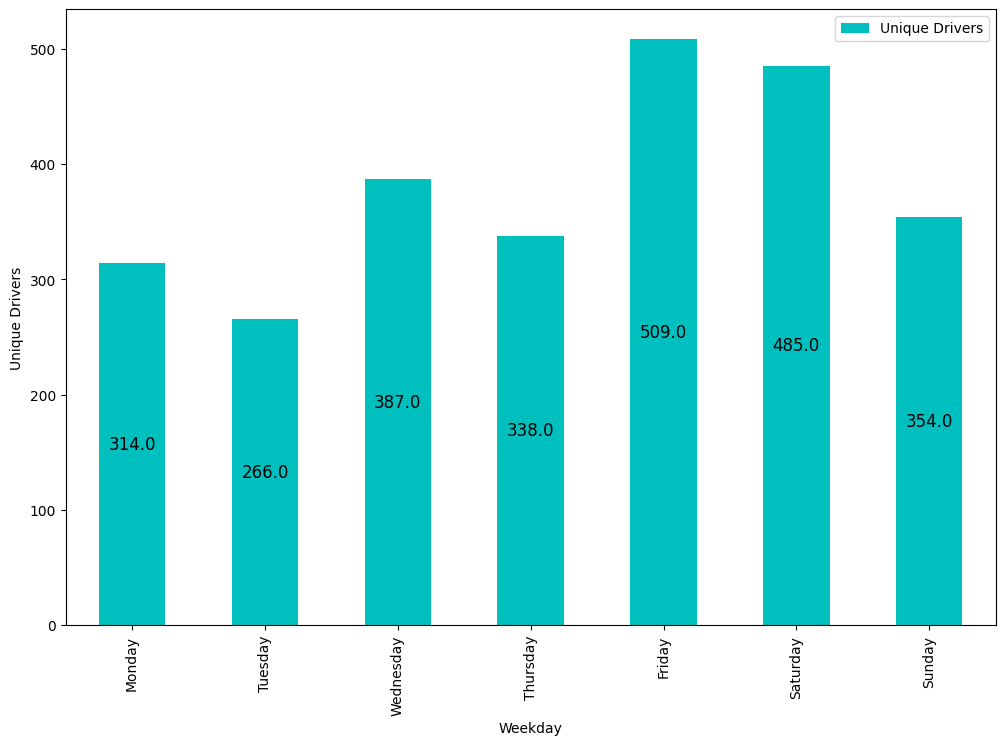

In [38]:
df['Weekday'] = df['Timestamp'].dt.weekday
df_agg_weekday = df.groupby('Weekday').agg({
    'Eyeballs ': 'sum',
    'Zeroes ': 'sum',
    'Requests ': 'sum',
    'Completed Trips ': 'sum',
    'Unique Drivers': 'sum'  # Include 'Unique Drivers' in the aggregation
}).reset_index()

day_of_week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_agg_weekday['Weekday'] = df_agg_weekday['Weekday'].map(day_of_week)

ax=df_agg_weekday[['Weekday','Unique Drivers']].plot(
    kind='bar', stacked=True, x='Weekday', color='c')
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12)
plt.ylabel("Unique Drivers")
plt.show()

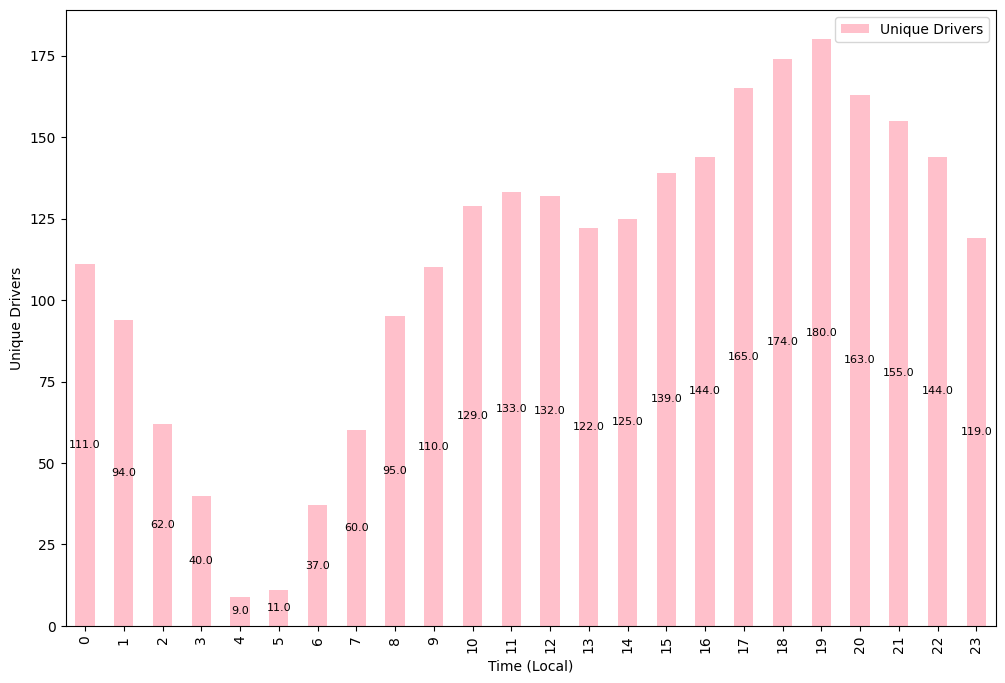

In [39]:
ax = df[['Time (Local)','Unique Drivers']].groupby('Time (Local)').sum().reset_index().plot(
    kind='bar', stacked=True, x='Time (Local)', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel("Unique Drivers")
plt.show()

It's aligned with what we observed in demand (requests, eyeballs, etc.) plots. Okay, we can move forward to questions now.

Question 1

Which date had the most completed trips during the two week period?

Since we reread the dataset, we need to apply forward fill on the Date column again to answer this question.

In [40]:
# forward fill empty Dates
df = df.fillna(method="ffill")
df

<ipython-input-40-f412aba56454>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,Weekday
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,0
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,0
...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00,0
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00,0
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00,0
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,0


The rest of the question is aggregating the dataset based on the date since it's asked in the question and then finding the largest value based on completed trips and their date.

In [41]:
# aggregate on Date since the question asks the completed trips by Date
df_agg_date = df.groupby('Date')['Completed Trips '].sum().reset_index()
df_agg_date.nlargest(1, 'Completed Trips ') # find the largest value based on completed trips and their date

,Date,Completed Trips
12,22-Sep-12,248


In [42]:
df_agg_date.nlargest(1, 'Completed Trips ')['Date']

,Date
12,22-Sep-12


# **Question 2**

What was the highest number of completed trips within a 24 hour period?

The question asks us to create forward 24-hour periods. We can do it by creating FixedForwardWindowIndexer and using it to apply the rolling sum function of pandas. As the question asks hour unit, we will create the timestamps as we did on exploratory part.

In [43]:
# to be able to use resample function, create timestamp and use as index
def create_timestamp(date, time):
    return pd.to_datetime(f"{date} {time}:00")
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)

# calculate rollings sums with 24 hours period
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
# Select only numeric columns for rolling sum calculation
numeric_cols = ['Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ', 'Unique Drivers']
df_agg_twentyfour_hrs = df.set_index("Timestamp")[numeric_cols].rolling(window=indexer, min_periods=1).sum()
df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips ')

,Eyeballs,Zeroes,Requests,Completed Trips,Unique Drivers
Timestamp,,,,,
2012-09-21 17:00:00,1015.0,207.0,367.0,278.0,349.0


We can output it by time interval by using the given information.

In [44]:
# parse time interval to output
time_format = "%Y/%m/%d %H:%M"
df_agg_twentyfour_hrs['Time Interval']  = df_agg_twentyfour_hrs.index.strftime(time_format) +  "-" + (df_agg_twentyfour_hrs.index + pd.Timedelta('24 hours')).strftime(time_format)
df_agg_twentyfour_hrs

,Eyeballs,Zeroes,Requests,Completed Trips,Unique Drivers,Time Interval
Timestamp,,,,,,
2012-09-10 07:00:00,212.0,38.0,39.0,29.0,150.0,2012/09/10 07:00-2012/09/11 07:00
2012-09-10 08:00:00,217.0,38.0,39.0,29.0,146.0,2012/09/10 08:00-2012/09/11 08:00
2012-09-10 09:00:00,222.0,40.0,37.0,27.0,138.0,2012/09/10 09:00-2012/09/11 09:00
2012-09-10 10:00:00,229.0,39.0,37.0,27.0,130.0,2012/09/10 10:00-2012/09/11 10:00
2012-09-10 11:00:00,232.0,38.0,37.0,28.0,124.0,2012/09/10 11:00-2012/09/11 11:00
...,...,...,...,...,...,...
2012-09-24 02:00:00,20.0,10.0,6.0,3.0,10.0,2012/09/24 02:00-2012/09/25 02:00
2012-09-24 03:00:00,17.0,7.0,4.0,3.0,10.0,2012/09/24 03:00-2012/09/25 03:00
2012-09-24 04:00:00,14.0,4.0,3.0,3.0,10.0,2012/09/24 04:00-2012/09/25 04:00


Let's find the result using nlargest( ) again.

In [45]:
completed_trips = df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips ')['Completed Trips '].values[0]
time_interval = df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips ')['Time Interval'].values[0]
print("Number of completed trips:", completed_trips)
print("Time Interval:", time_interval)

Number of completed trips: 278.0
Time Interval: 2012/09/21 17:00-2012/09/22 17:00


# **Question 3**

Which hour of the day had the most requests during the two week period?

In [46]:
# aggregate on hour
df_agg_time = df.groupby('Time (Local)')['Requests '].sum().reset_index()
df_agg_time.nlargest(1, 'Requests ')

,Time (Local),Requests
23,23,184


In [47]:
df_agg_time.nlargest(1, 'Requests ')['Time (Local)']

,Time (Local)
23,23


# **Question 4**

What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?

Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

To find it we need to count all zeroes on the dataset and calculate the percentages using the weekend zeroes count.

In [48]:
# all zeroes in the dataset
total_zeroes = df['Zeroes '].sum()
total_zeroes

np.int64(1429)

In [49]:
# all zeroes in weekend based on given condition
df['Day'] = pd.to_datetime(df['Date'], format='%d-%b-%y').dt.dayofweek # Changed the format to '%d-%b-%y' to match the date format in the data "10-Sep-12"
weekend_zeroes = df[((df['Day'] == 4) & (df['Time (Local)'] >= 17))
                          | (df['Day'] == 5) |
                          ((df['Day'] == 6) & (df['Time (Local)'] < 3))]['Zeroes '].sum()
weekend_zeroes

np.int64(641)

In [50]:
# calculate the percentage
weekend_zeroes_pct = weekend_zeroes / total_zeroes * 100
print(weekend_zeroes_pct,'%')

44.856543037088876 %


# **Question 5**

What is the weighted average ratio of completed trips per driver during the two week period?

Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

In order to calculate weighted average ratio of completed trips per driver, first we will calculate the ratio of completed per driver. Next, we will assign weights to each row based on its completed trip ratio to all completed trips. We will discard rows with zero unique drivers since it would lead to have nan rows.

In [51]:
# calculate the ratio
df['completed_trip_ratio_per_driver'] = df['Completed Trips '] / df['Unique Drivers']
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,Weekday,Day,completed_trip_ratio_per_driver
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0,0,0.222222
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0,0,0.142857
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0,0,0.000000
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,0,0,0.000000
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,0,0,0.363636
...,...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00,0,0,NaN
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00,0,0,NaN
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00,0,0,NaN
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,0,0,0.333333


In [52]:
# drop rows with nan
dataset_without_zero_unique_driver = df[df['Unique Drivers'] > 0]
# calculate weighted average by giving weight as day's completed trip ratio all completed trips
weighted_average_ratio = np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'], weights=dataset_without_zero_unique_driver['Completed Trips '])
weighted_average_ratio

np.float64(0.8282775715092395)

The weighted average is found as 0.002788813372084982. Let's also see what it would be like if we wouldn't use weighted average approach.

In [53]:
# check it is not same with normal average
np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'])

np.float64(0.4743397876937869)

It is very different from what we calculated.

# **Question 6**

In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

We will resample our dataset with 8 hours frequency by summing values within each 8 hours shift. We can do it by using the resample(frequency) function from pandas. Then, we can apply the sum for values that fall within 8 hours intervals.

In [54]:
# resample with 8 hours period
df_agg_eight_hrs = df.set_index("Timestamp").resample('8H').sum()
df_agg_eight_hrs.head()

<ipython-input-54-fc924e65eb98>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_agg_eight_hrs = df.set_index("Timestamp").resample('8H').sum()


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Weekday,Day,completed_trip_ratio_per_driver
Timestamp,,,,,,,,,,
2012-09-10 00:00:00,10-Sep-12,7,5,0,2,2,9,0,0,0.222222
2012-09-10 08:00:00,10-Sep-1210-Sep-1210-Sep-1210-Sep-1210-Sep-121...,92,78,10,9,11,89,0,0,0.831169
2012-09-10 16:00:00,10-Sep-1210-Sep-1210-Sep-1210-Sep-1210-Sep-121...,156,106,16,15,21,40,0,0,3.047619
2012-09-11 00:00:00,11-Sep-1211-Sep-1211-Sep-1211-Sep-1211-Sep-121...,28,33,12,5,7,17,8,8,1.400000
2012-09-11 08:00:00,11-Sep-1211-Sep-1211-Sep-1211-Sep-1211-Sep-121...,92,108,11,5,6,58,8,8,0.690079


Let's also put time intervals resulting from resampling into the DataFrame.

In [55]:
time_format = "%Y/%m/%d %H:%M"
df_agg_eight_hrs['Time Interval']  = df_agg_eight_hrs.index.strftime(time_format) +  "-" + (df_agg_eight_hrs.index + pd.Timedelta('8 hours')).strftime(time_format)
df_agg_eight_hrs.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Weekday,Day,completed_trip_ratio_per_driver,Time Interval
Timestamp,,,,,,,,,,,
2012-09-10 00:00:00,10-Sep-12,7,5,0,2,2,9,0,0,0.222222,2012/09/10 00:00-2012/09/10 08:00
2012-09-10 08:00:00,10-Sep-1210-Sep-1210-Sep-1210-Sep-1210-Sep-121...,92,78,10,9,11,89,0,0,0.831169,2012/09/10 08:00-2012/09/10 16:00
2012-09-10 16:00:00,10-Sep-1210-Sep-1210-Sep-1210-Sep-1210-Sep-121...,156,106,16,15,21,40,0,0,3.047619,2012/09/10 16:00-2012/09/11 00:00
2012-09-11 00:00:00,11-Sep-1211-Sep-1211-Sep-1211-Sep-1211-Sep-121...,28,33,12,5,7,17,8,8,1.400000,2012/09/11 00:00-2012/09/11 08:00
2012-09-11 08:00:00,11-Sep-1211-Sep-1211-Sep-1211-Sep-1211-Sep-121...,92,108,11,5,6,58,8,8,0.690079,2012/09/11 08:00-2012/09/11 16:00


Now, continue with finding the greatest request with its 8 hours shift.

In [56]:
df_agg_eight_hrs.nlargest(1, 'Requests ')

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Weekday,Day,completed_trip_ratio_per_driver,Time Interval
Timestamp,,,,,,,,,,,
2012-09-21 16:00:00,21-Sep-1221-Sep-1221-Sep-1221-Sep-1221-Sep-122...,156,515,88,153,192,198,32,32,6.357265,2012/09/21 16:00-2012/09/22 00:00


Finally, output the time interval.

In [57]:
# output time interval
df_agg_eight_hrs.nlargest(1, 'Requests ')['Time Interval'][0]

<ipython-input-57-ee681ab53b58>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_agg_eight_hrs.nlargest(1, 'Requests ')['Time Interval'][0]


'2012/09/21 16:00-2012/09/22 00:00'

# **Question 7**

True or False: Driver supply always increases when demand increases during the two week period.

Tip: Visualize the data to confirm your answer if needed.

According to given statement, if there is an increase in demand, there should be an increase also in supply. We can assume requests are representing the demand. We will calculate the difference in the demand by comparing each hour demand/supply with a previous hour. Pandas .shift( ) function shifts a column upward/downward. Then, we will substract the current value of demand/supply from its previous hour value and see the differences as new columns.

In [58]:
# create empty dataframe with only timestamps
difference_df = pd.DataFrame(df['Timestamp'])
# calculate request differences to catch request increases
difference_df['request_diff'] = df['Requests '].shift(-1) - df['Requests ']
# do same of supply side
difference_df['supply_diff'] = df['Unique Drivers'].shift(-1) - df['Unique Drivers']
difference_df

,Timestamp,request_diff,supply_diff
0,2012-09-10 07:00:00,0.0,5.0
1,2012-09-10 08:00:00,-2.0,0.0
2,2012-09-10 09:00:00,1.0,0.0
3,2012-09-10 10:00:00,3.0,-3.0
4,2012-09-10 11:00:00,-2.0,0.0
...,...,...,...
331,2012-09-24 02:00:00,-1.0,0.0
332,2012-09-24 03:00:00,-1.0,0.0
333,2012-09-24 04:00:00,1.0,3.0
334,2012-09-24 05:00:00,1.0,4.0


We will filter all rows with the increase on the request side. Then, we will check the supply difference column to be positive for all filtered rows by using .all().item()

In [59]:
# check if request increases, supply also increases
(difference_df[difference_df['request_diff'] > 0]['supply_diff'] > 0).all().item()

False

It turns out the given statement was false. Let's also check it by using a plot.

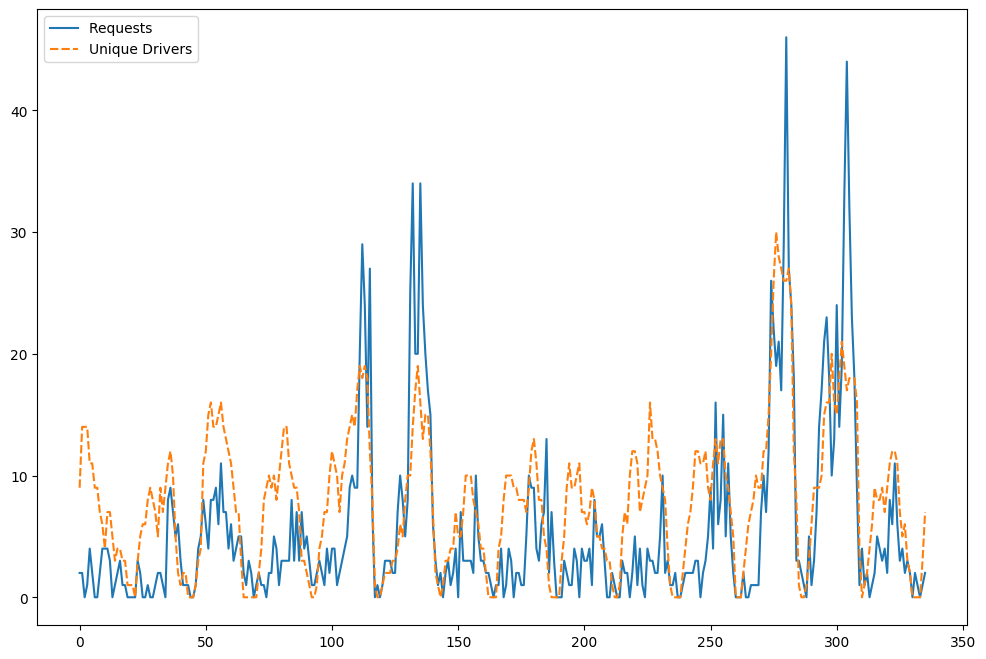

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.lineplot(data=df[['Requests ', 'Unique Drivers', 'Timestamp']])
plt.show()

# **Question 8**

In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

As we have done it before in question 3, we are able to create time periods using rolling sums. Since the question wants us to calculate the ratio for 72 hour period, we will create our indexer using windows_size=72

In [62]:
# calculate rolling sums by 3 days/ 72 hours
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
# Select only numeric columns for rolling sum calculation
numeric_cols = ['Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ', 'Unique Drivers']
df_agg_three_days = df.set_index("Timestamp")[numeric_cols].rolling(window=indexer, min_periods=1).sum().reset_index()
df_agg_three_days['zeros_to_eyeballs_ratio'] = df_agg_three_days['Zeroes '] / df_agg_three_days['Eyeballs ']

The code above calculates the rolling sum for all the timestamps in the dataset by considering everything in 72 hours after each timestamp. Even if it does not exist in our dataset. For instance, the last timestamp in the dataset, i.e. 2012-09-24 06:00:00 would still be a beginning of a 72 hours period ending on 2012-09-27 06:00:00 but there are no data past this initial time period. Therefore, it'd make sense to filter the dataset so that all 72 hour periods only include the timestamps that exist in the data.

In [63]:
df_agg_three_days = df_agg_three_days[df_agg_three_days['Timestamp'] <= (df_agg_three_days['Timestamp'].max() - pd.Timedelta(days=3))]

Create a time interval column to make the intervals clear.

In [64]:
time_format = "%Y/%m/%d %H:%M"
df_agg_three_days['Time Interval']  = df_agg_three_days['Timestamp'].dt.strftime(time_format) +  "-" + (df_agg_three_days['Timestamp'] + pd.Timedelta('3 days')).dt.strftime(time_format)
df_agg_three_days

,Timestamp,Eyeballs,Zeroes,Requests,Completed Trips,Unique Drivers,zeros_to_eyeballs_ratio,Time Interval
0,2012-09-10 07:00:00,956.0,172.0,211.0,159.0,473.0,0.179916,2012/09/10 07:00-2012/09/13 07:00
1,2012-09-10 08:00:00,961.0,173.0,210.0,158.0,468.0,0.180021,2012/09/10 08:00-2012/09/13 08:00
2,2012-09-10 09:00:00,964.0,174.0,209.0,157.0,462.0,0.180498,2012/09/10 09:00-2012/09/13 09:00
3,2012-09-10 10:00:00,970.0,175.0,209.0,157.0,457.0,0.180412,2012/09/10 10:00-2012/09/13 10:00
4,2012-09-10 11:00:00,976.0,176.0,210.0,159.0,453.0,0.180328,2012/09/10 11:00-2012/09/13 11:00
...,...,...,...,...,...,...,...,...
259,2012-09-21 02:00:00,2209.0,465.0,724.0,535.0,780.0,0.210502,2012/09/21 02:00-2012/09/24 02:00
260,2012-09-21 03:00:00,2207.0,468.0,724.0,534.0,775.0,0.212053,2012/09/21 03:00-2012/09/24 03:00
261,2012-09-21 04:00:00,2207.0,468.0,725.0,534.0,775.0,0.212053,2012/09/21 04:00-2012/09/24 04:00
262,2012-09-21 05:00:00,2208.0,469.0,725.0,534.0,775.0,0.212409,2012/09/21 05:00-2012/09/24 05:00


Find the largest ratio.

In [65]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')['zeros_to_eyeballs_ratio']

,zeros_to_eyeballs_ratio
118,0.292977


Output the time interval of the largest ratio which is 2012/09/15 05:00-2012/09/18 05:00.

In [66]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')['Time Interval']

,Time Interval
118,2012/09/15 05:00-2012/09/18 05:00


# **Question 9**

If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

Hint: Consider both rider eyeballs and driver supply when choosing

By using the given hint, we can understand we have to consider eyeballs as demand. As logically, we would decide to add 5 extra drivers to the busiest hour of the day with the highest eyeballs but lowest drivers. We can aggregate our dataset by a given time column and then find the largest ratio.

In [68]:
df_agg_time = df.groupby('Time (Local)')[['Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ', 'Unique Drivers']].sum().reset_index()
df_agg_time['eyeball_to_driver_ratio'] = df_agg_time['Eyeballs '] / df_agg_time['Unique Drivers']
df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')

,Time (Local),Eyeballs,Zeroes,Requests,Completed Trips,Unique Drivers,eyeball_to_driver_ratio
23,23,488,193,184,126,119,4.10084


Finally, output the time that we decide.

In [69]:
df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')['Time (Local)']

,Time (Local)
23,23


# **Question 10**

True or False: There is exactly two weeks of data in this analysis

It's very easy to answer this question by pandas timedelta which is explained here. Let's calculate the difference between the last and first dates in our DataFrame.

In [70]:
# check time difference between the beginning and end
(df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0])

Timedelta('13 days 23:00:00')

Compare it with exactly 14 days value.

In [71]:
# compare it with timedelta 14 days to see if the difference exactly matches as 14 days
pd.Timedelta('14 days') == df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0]

False

The statement is false, the whole time difference is shorter than 14 days as we prove below.

In [72]:
# the difference is less than 14 days
pd.Timedelta('14 days') > df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0]

True

# **Question 11**

Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

Tip: Visualize the data to confirm your answer if needed.

We will check the minimum points of supply and demand by aggregating the given data by time. Before aggregating, we will calculate the minimum supply and demand per day.

In [73]:
# find min supply and demand per day
df_min_supply_per_day = df.groupby(['Date'])['Unique Drivers'].min().reset_index().rename(columns={'Unique Drivers':'min_supply_per_day'})
df_min_demand_per_day = df.groupby(['Date'])['Requests '].min().reset_index().rename(columns={'Requests ':'min_demand_per_day'})

# merge demand and supply based on date
supply_demand = pd.merge(df_min_supply_per_day, df_min_demand_per_day, on="Date")
supply_demand

,Date,min_supply_per_day,min_demand_per_day
0,10-Sep-12,3,0
1,11-Sep-12,0,0
2,12-Sep-12,0,0
3,13-Sep-12,0,0
4,14-Sep-12,0,1
5,15-Sep-12,0,0
6,16-Sep-12,0,0
7,17-Sep-12,0,0
8,18-Sep-12,0,0
9,19-Sep-12,0,0


In [74]:
# merge found min values with initial dataset on Date
dataset_w_min_supply_demand = pd.merge(df, supply_demand, on="Date")
dataset_w_min_supply_demand

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,Weekday,Day,completed_trip_ratio_per_driver,min_supply_per_day,min_demand_per_day
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0,0,0.222222,3,0
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0,0,0.142857,3,0
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0,0,0.000000,3,0
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,0,0,0.000000,3,0
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,0,0,0.363636,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00,0,0,NaN,0,0
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00,0,0,NaN,0,0
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00,0,0,NaN,0,0
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,0,0,0.333333,0,0


Check for exact matches with minimum supply and demand. Output the most occurring time of matched rows using mode( ).

In [75]:
# check the exact matches with natural minimums
min_point = dataset_w_min_supply_demand[(dataset_w_min_supply_demand.min_supply_per_day == dataset_w_min_supply_demand['Unique Drivers']) &
                           (dataset_w_min_supply_demand.min_demand_per_day == dataset_w_min_supply_demand['Requests '])]['Time (Local)'].mode()
min_point

,Time (Local)
0,4


In [76]:
# minimum hour is 4 am
min_point[0]

np.int64(4)


Let's also confirm it by aggregating on time and plotting the result.

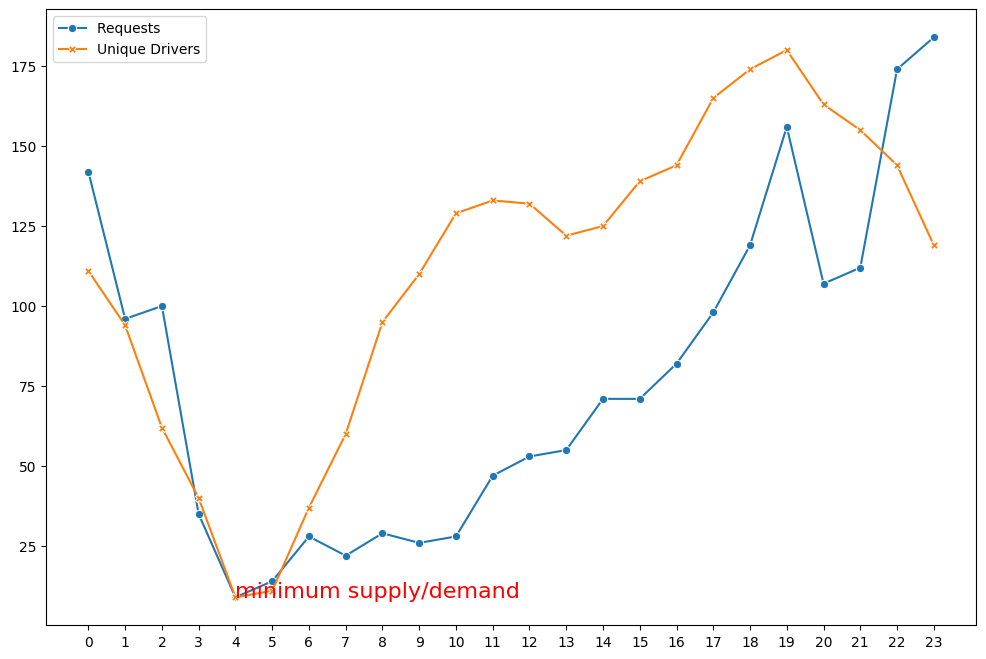

In [78]:
# plot and annotate the minimum hour
df_agg_time = df.groupby('Time (Local)')[['Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ', 'Unique Drivers']].sum().reset_index()
min_point_value = df_agg_time['Requests '][min_point[0]]
plt.figure(figsize=(12,8))
fig = sns.lineplot(data=df_agg_time[['Requests ', 'Unique Drivers']], markers=True, dashes=False)
fig.set_xticks(df_agg_time['Time (Local)'])
plt.annotate('minimum supply/demand', xy=(min_point[0], min_point_value), color='r', fontsize=16)
plt.show()